In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('fake_job_postings.csv')

In [8]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
data.shape

(17880, 18)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [11]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Data Pre-processing

In [12]:
# Deal with missing values and drop unneccessary columns

# Location missing values will be assigned none
data['location'] = data.location.fillna('none')

# department missing values will be assigned not specified
data['department'] = data.department.fillna('not specified')

# drop salary range, benefits, telecommuting, has_questions (not compulsory) in the context of Nigeria
data.drop(['salary_range', 'benefits','telecommuting','has_questions'],
             axis=1, inplace=True)

# Company profile missing values will be assigned none
data['company_profile'] = data.company_profile.fillna('none')

# Company profile missing values will be assigned not specified
data['requirements'] = data.requirements.fillna('not specified')

# employment_type missing values will be assigned not specified
data['employment_type'] = data.employment_type.fillna('not specified')

# required_experience missing values will be assigned not specified
data['required_experience'] = data.required_experience.fillna('not specified')

# required_education missing values will be assigned not specified
data['required_education'] = data.required_education.fillna('not specified')

# industry missing values will be assigned not specified
data['industry'] = data.industry.fillna('not specified')

# function missing values will be assigned not specified
data['function'] = data.function.fillna('not specified')

In [13]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            1
requirements           0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [14]:
data.head()

,job_id,title,location,department,company_profile,description,requirements,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,1,Other,Internship,not specified,not specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,1,Full-time,Not Applicable,not specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",not specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,1,not specified,not specified,not specified,not specified,not specified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",not specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [15]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'has_company_logo', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [16]:
print('Data set:')
for col_name in data.columns:
    if data[col_name].dtypes == 'object' :
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()

Data set:
Feature 'title' has 11231 categories
Feature 'location' has 3106 categories
Feature 'department' has 1338 categories
Feature 'company_profile' has 1710 categories
Feature 'description' has 14802 categories
Feature 'requirements' has 11968 categories
Feature 'employment_type' has 6 categories
Feature 'required_experience' has 8 categories
Feature 'required_education' has 14 categories
Feature 'industry' has 132 categories
Feature 'function' has 38 categories



In [17]:
df = data[['title', 'location','company_profile', 'requirements', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent']]

In [19]:
# Check if there is any null value
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [20]:
#Check for number of null values
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [21]:
df_num = df[['fraudulent']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

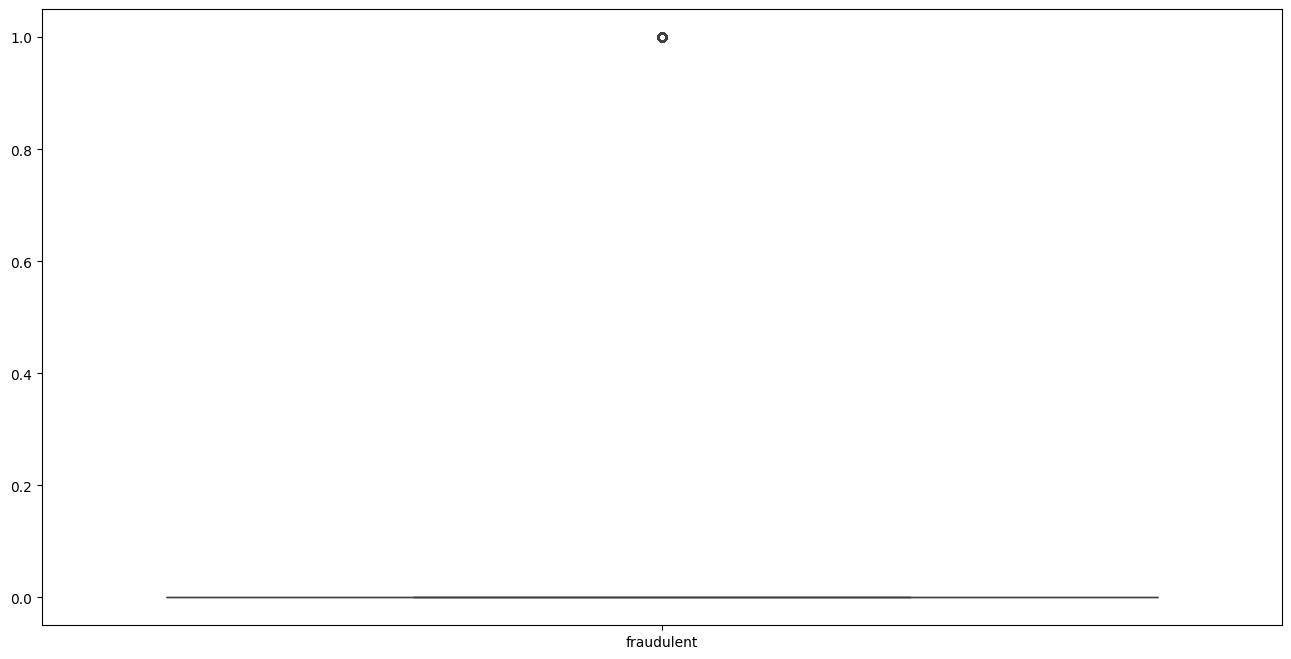

In [22]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sns.boxplot(data = df_num)
plt.show()

In [23]:
#Removing Outliers from columns
df_num = df_num[df_num['fraudulent'] < 0.9 ]

In [24]:
df.shape


(17880, 10)

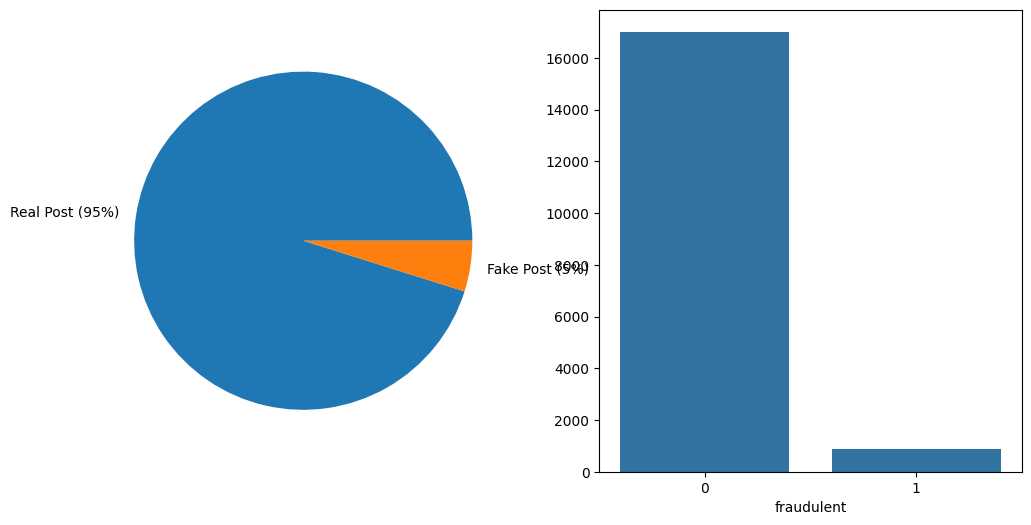

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie Chart
df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])

# Bar Plot (Corrected)
temp = df["fraudulent"].value_counts()
sns.barplot(x=temp.index, y=temp.values, ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')

plt.show()


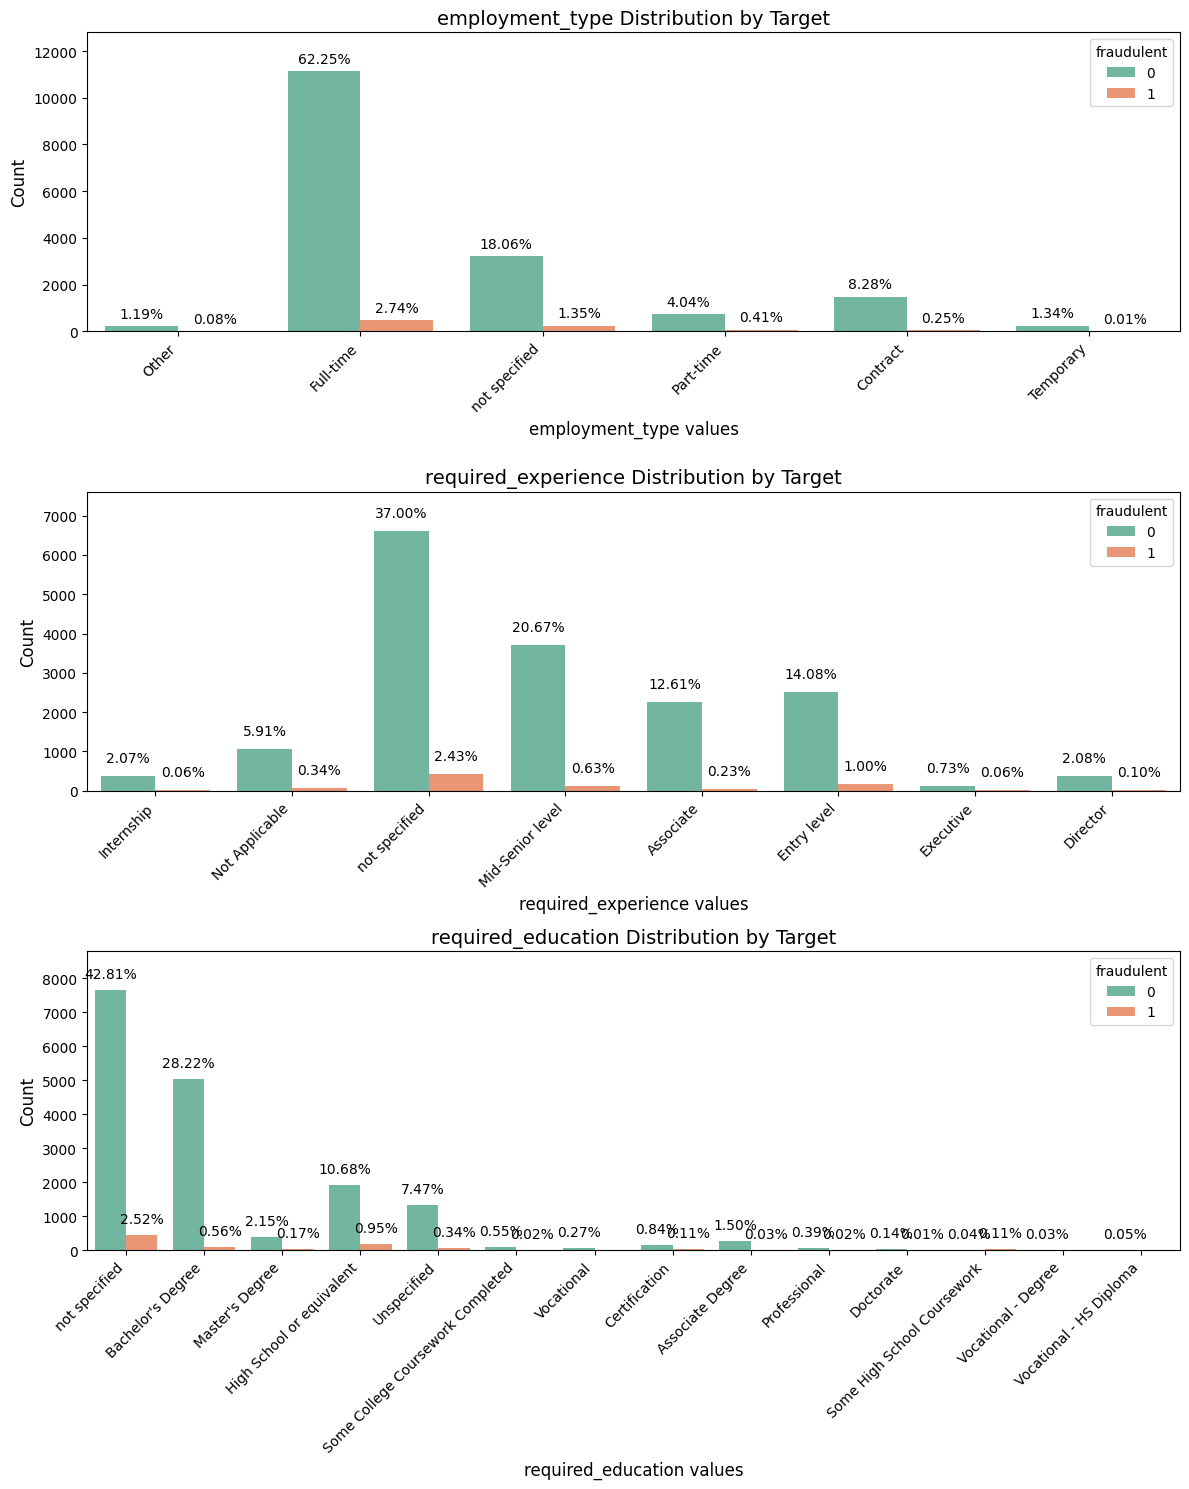

In [28]:
cat_cols = ["employment_type", "required_experience", "required_education"]

# Set figure size
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(12, 15))

# Loop through categorical columns
for i, col in enumerate(cat_cols):
    ax = axes[i]  # Select subplot axis
    
    # Countplot with hue (fraudulent vs real jobs)
    sns.countplot(x=col, data=df, hue='fraudulent', palette='Set2', ax=ax)
    
    # Titles & Labels
    ax.set_title(f'{col} Distribution by Target', fontsize=14)
    ax.set_xlabel(f'{col} values', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    
    # Rotate x-ticks for better readability
    ax.set_xticks(ax.get_xticks())  
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=45, ha='right')
    
    # Add percentage labels above bars
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label non-zero bars
            ax.text(p.get_x() + p.get_width()/2.,
                    height + (0.02 * total),  # Adjust height dynamically
                    f'{height / total * 100:.2f}%',
                    ha="center", fontsize=10)

    # Set Y-axis limit slightly above max count
    ax.set_ylim(0, max([p.get_height() for p in ax.patches if p.get_height() > 0]) * 1.15)

# Adjust spacing
plt.tight_layout()
plt.show()


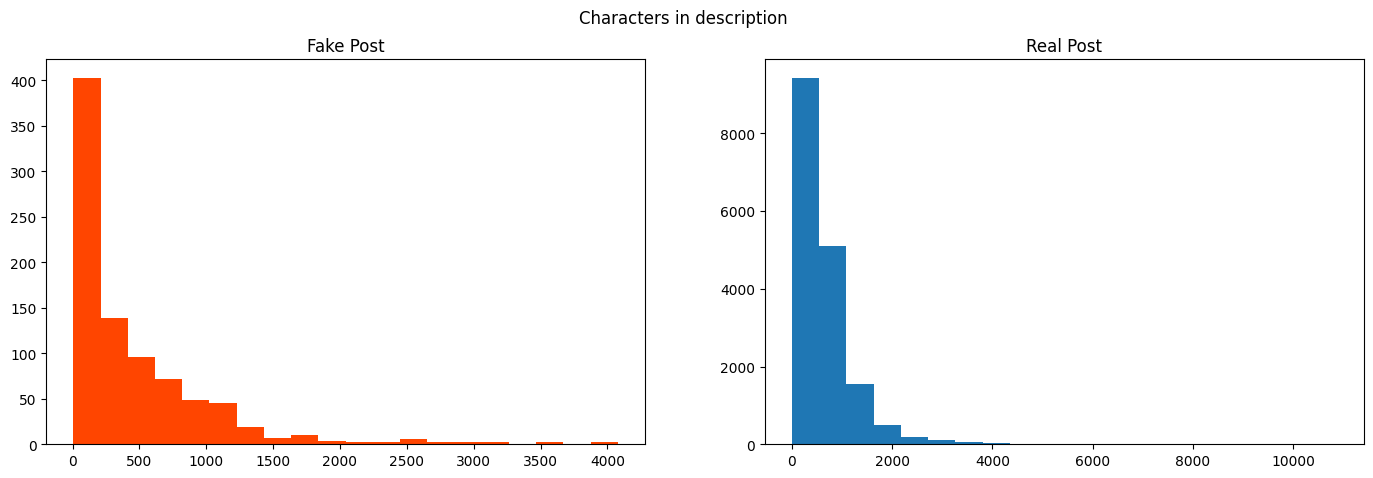

In [29]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df[df["fraudulent"]==1]['requirements'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=df[df["fraudulent"]==0]['requirements'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in description')
plt.show()

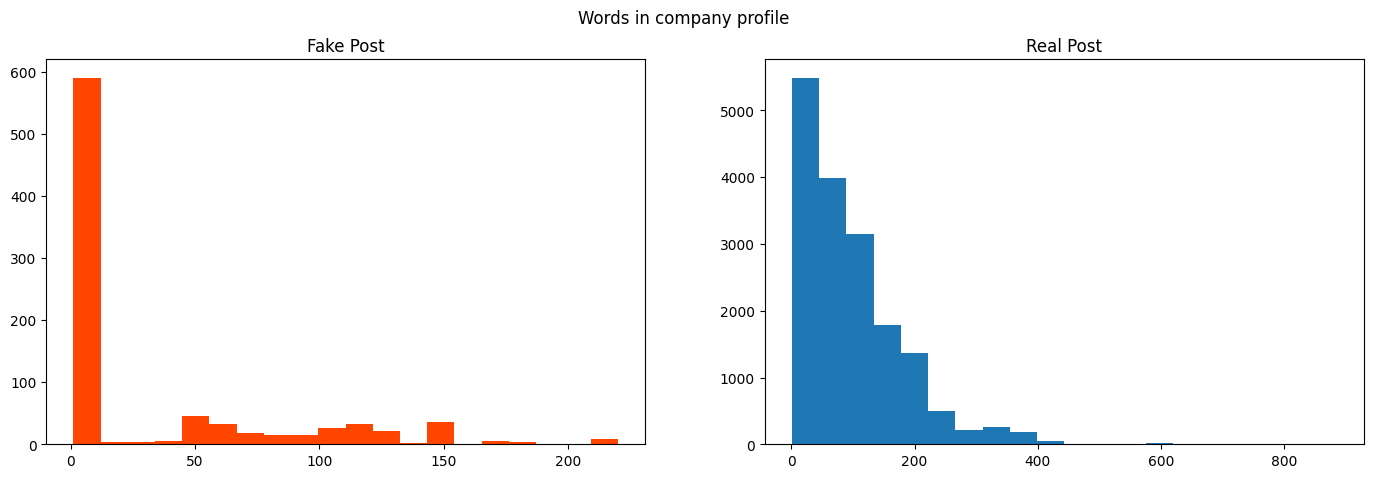

In [30]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=df[df["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=df[df["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()

In [31]:
df['fraudulent'].values

array([0, 0, 0, ..., 0, 0, 0], shape=(17880,))

In [32]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(866, 10)

In [33]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.shape

(17014, 10)

In [34]:
fraud = fraud.sample(1403, replace=True)
fraud.shape, not_fraud.shape

((1403, 10), (17014, 10))

In [35]:
import pandas as pd

# Example DataFrames (fraud & not_fraud)
df = pd.concat([fraud, not_fraud], ignore_index=True)  # Use concat instead of append
df.reset_index(drop=True, inplace=True)  # Reset index properly


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])

In [37]:
df = df.reset_index()
df.head()

,index,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,2233,2821,169,2766,1,2,4,112,7,1
1,1,6258,2977,321,10349,1,5,1,58,18,1
2,2,7812,2512,1672,11420,1,2,2,0,1,1
3,3,10349,2268,1672,11420,1,6,9,26,37,1
4,4,8361,366,154,6973,1,5,1,58,18,1


In [38]:
from sklearn.model_selection import train_test_split

X = df[['index', 'title', 'location', 'company_profile', 'requirements',
       'employment_type','required_experience', 'required_education', 'industry', 'function']].values
Y = df[['fraudulent']].values


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [40]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((13812, 10), (4605, 10), (13812, 1), (4605, 1))

In [41]:
X_test

array([[14604,  8408,   366, ...,     1,   131,    31],
       [ 6255,  1699,  1819, ...,    13,   126,    37],
       [17454,  6806,  1711, ...,    13,   131,    37],
       ...,
       [10512,  9584,  2836, ...,    13,   111,    37],
       [ 9560,  3174,  2973, ...,     1,    31,    37],
       [11286,  5967,    93, ...,     1,    39,    22]], shape=(4605, 10))

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [43]:
import warnings
warnings.filterwarnings('ignore')


In [44]:
### Logistic Regression

clf=LogisticRegression()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with Logistic Regression:',accuracy_score(Y_test, preds), '%')

### Random Forest

clf=RandomForestClassifier()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with Random Forest:',accuracy_score(Y_test, preds), '%')

### Support Vector Machine

clf=SVC()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with Support Vector Machine:',accuracy_score(Y_test, preds), '%')

### Decision Tree

clf=DecisionTreeClassifier()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with Decision Tree:',accuracy_score(Y_test, preds), '%')

### K-Nearest Neighbors

clf=KNeighborsClassifier()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with K-Nearest Neighbors :',accuracy_score(Y_test, preds), '%')

### Naive Bayes

clf=GaussianNB()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with Naive Bayes:',accuracy_score(Y_test, preds), '%')


accuracy with Logistic Regression: 0.993485342019544 %
accuracy with Random Forest: 1.0 %
accuracy with Support Vector Machine: 0.9976112920738328 %
accuracy with Decision Tree: 1.0 %
accuracy with K-Nearest Neighbors : 0.9939196525515743 %
accuracy with Naive Bayes: 0.9921824104234528 %


In [45]:
test_vector = np.reshape(np.asarray([17614,5362,1393,1669,11417,1,7,13,75,37]),(1,10))
p = int(clf.predict(test_vector)[0])

if p==0:
    print('Job profile is Real')
else:
    print('Job profile is fake')


Job profile is Real


In [46]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))